# BASE DE DATOS: Gold Price


# Equipo :10## Integrantes:

#### Rafael Elizondo Aranda 187942
#### Andre Damian Valdez
#### Kevin Gonzalez Gonzalez 1805425

# 2) Descripcion de los Datos
-	Los datos mostrados en la base de datos vienen mostrados en columnas, cada columna muestra los diferentes precios del oro en sus respectivas fechas y se muestran por sus clasificaciones es decir, su precio mas alto en esa fecha, su minimo, el precio promedio y por ultimo nos muestra el cambio con respecto al dia anterior

In [3]:
oro.shape

(2531, 6)

In [4]:
oro.dtypes

Date      object
Price    float64
Open     float64
High     float64
Low      float64
Chg%     float64
dtype: object

- Aqui se puede apreciar que nuestra base de datos cuenta con 2531 elementos es decir 2531 fechas que nos dicen el precio y esta conformado por 6 columnas, ademas podemos ver que todas nuestras variables son flotantes de 64 bits la unica que es diferente es la fecha


# 3) Justificacion del uso de Datos
- Nos llamó la atención esta base de datos por que venían los diferentes precios que podía tener el oro y esto nos puede crear alternativas para trabajarlo ya sea trabajarlo con sus precios promedios, sus precios de cierre, o sus máximos y mínimos.
-	El beneficio que encontramos de trabajar con estos datos son las diferentes opciones que nos da para trabajar además de que la manera en que están estructurados los datos nos puede hacer facil trabajar con ellos y nos brinda diversos tipos de opciones de como interpretar los datos

# 4) OBJETIVOS
- Nuestro objetivo en este proyecto será poder crear una ecuación para de esta forma poder conocer el precio del oro en sus distintas fechas, para de esta forma poder graficar y observar la tendencia que tiene y como se comporta para de esta forma poder recomendar en que fechas comprar oro o vender el oro dependiendo de sus necesidades y como segundo objetivo buscaremos en que dias de la semana o mes en promedio es mejor comprar si es que existe alguna fecha 

In [31]:

import pandas as pd
import numpy as np
oro = pd.read_csv("C:/Users/rafae/OneDrive/Documentos/fcfm/7 semestre/mineria/PrecioOro.csv", encoding='utf8')

# Desarrollo de las herramientas
Datos sin manipular

In [32]:
oro

,Date,Price,Open,High,Low,Chg%
0,"Sep 11, 2020",1957.35,1952.55,1963.3,1944.35,-0.0035
1,"Sep 10, 2020",1964.30,1955.30,1975.2,1948.60,0.0048
2,"Sep 09, 2020",1954.90,1939.40,1959.7,1926.30,0.0060
3,"Sep 08, 2020",1943.20,1938.00,1948.3,1911.70,0.0031
4,"Sep 07, 2020",1937.10,1940.70,1947.4,1930.45,-0.0018
...,...,...,...,...,...,...
2526,"Jan 07, 2011",1368.50,1372.70,1377.2,1355.50,-0.0021
2527,"Jan 06, 2011",1371.40,1374.80,1376.5,1368.90,-0.0015
2528,"Jan 05, 2011",1373.40,1383.40,1384.0,1364.20,-0.0037
2529,"Jan 04, 2011",1378.50,1409.60,1410.9,1375.80,-0.0310


In [33]:
oro.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Chg%'], dtype='object')

In [81]:

nuevaoro = oro.rename(columns ={'Date':'Fecha', 'Price': 'PrecioProm', 'Open': 'Apertura', 'High':'Maximo', 'Low':'Minimo','Chg%':'Cambio'})

In [82]:
nuevaoro

,Fecha,PrecioProm,Apertura,Maximo,Minimo,Cambio
0,"Sep 11, 2020",1957.35,1952.55,1963.3,1944.35,-0.0035
1,"Sep 10, 2020",1964.30,1955.30,1975.2,1948.60,0.0048
2,"Sep 09, 2020",1954.90,1939.40,1959.7,1926.30,0.0060
3,"Sep 08, 2020",1943.20,1938.00,1948.3,1911.70,0.0031
4,"Sep 07, 2020",1937.10,1940.70,1947.4,1930.45,-0.0018
...,...,...,...,...,...,...
2526,"Jan 07, 2011",1368.50,1372.70,1377.2,1355.50,-0.0021
2527,"Jan 06, 2011",1371.40,1374.80,1376.5,1368.90,-0.0015
2528,"Jan 05, 2011",1373.40,1383.40,1384.0,1364.20,-0.0037
2529,"Jan 04, 2011",1378.50,1409.60,1410.9,1375.80,-0.0310


In [86]:
preciosoro = nuevaoro.drop('Cambio',axis = 1 )
preciosoro

,Fecha,PrecioProm,Apertura,Maximo,Minimo
0,"Sep 11, 2020",1957.35,1952.55,1963.3,1944.35
1,"Sep 10, 2020",1964.30,1955.30,1975.2,1948.60
2,"Sep 09, 2020",1954.90,1939.40,1959.7,1926.30
3,"Sep 08, 2020",1943.20,1938.00,1948.3,1911.70
4,"Sep 07, 2020",1937.10,1940.70,1947.4,1930.45
...,...,...,...,...,...
2526,"Jan 07, 2011",1368.50,1372.70,1377.2,1355.50
2527,"Jan 06, 2011",1371.40,1374.80,1376.5,1368.90
2528,"Jan 05, 2011",1373.40,1383.40,1384.0,1364.20
2529,"Jan 04, 2011",1378.50,1409.60,1410.9,1375.80


- Para esta base, no se elimino ninguna columna por que por el momento todas pueden tener diferentes utilidades que nos ayuden a nuestro objetivo
- Solo se cambiaron los nombres de las columnas a español por practicidad
- Se creo una segunda base de datos la cual servira para hacer calculos y solo tomara en cuenta los precios del oro

 La fecha nos indica en la fecha que estamos hablando y es un objeto es decir una secuencia de caracteres
PrecioProm nos indica el precio promedio en ese dia
Apertura nos dice cual fue el precio inicial en ese dia
High nos indica cual fue su precio mas alto
Low nos indica el precio mas bajo en ese dia 
cambio nos indica el porcentaje de cambio con respecto al dia anterior
y todos los datos son flotantes de 64 bitz

# Datos Nulos
verificamos la existencia de datos nulos

In [36]:
nuevaoro.isnull()

,Fecha,PrecioProm,Apertura,Maximo,Minimo,Cambio
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2526,False,False,False,False,False,False
2527,False,False,False,False,False,False
2528,False,False,False,False,False,False
2529,False,False,False,False,False,False


In [37]:
nuevaoro.isnull().any()

Fecha         False
PrecioProm    False
Apertura      False
Maximo        False
Minimo        False
Cambio        False
dtype: bool

Podemos ver que todas las casillas contienen datos por que lo que no contiene datos vacios

In [38]:
nuevaoro.isnull().sum()


Fecha         0
PrecioProm    0
Apertura      0
Maximo        0
Minimo        0
Cambio        0
dtype: int64

### La base no contiene datos nulos por lo que no fue necesario la eliminacion de estos datos

# Estadistica basica de los datos

In [39]:
nuevaoro.describe()


,PrecioProm,Apertura,Maximo,Minimo,Cambio
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,1428.516148,1421.804058,1426.688119,1416.290885,0.000254
std,179.401005,183.482977,187.313509,179.204684,0.016016
min,1070.800000,1070.100000,1074.200000,1069.200000,-0.111300
25%,1300.200000,1291.350000,1293.885000,1288.300000,-0.004700
50%,1370.300000,1360.500000,1362.300000,1359.300000,0.000100
75%,1551.200000,1552.000000,1561.350000,1541.150000,0.005300
max,2069.400000,2076.400000,2089.200000,2049.000000,0.127100


Los datos de dispersion y tendencia central nos son muy importantes puesto que nuestro proyecto consiste crear una regresion lineal, ademas de que estos datos nos ayudan para ver como se comporta el precio del oro a traves del dia y para ver si existe alguna anomalia es decir que el precio es mucho mayor al promedio o mucho menor.

In [40]:
nuevaoro.corr()

,PrecioProm,Apertura,Maximo,Minimo,Cambio
PrecioProm,1.000000,0.984049,0.985651,0.984204,0.069178
Apertura,0.984049,1.000000,0.998967,0.998287,0.026734
Maximo,0.985651,0.998967,1.000000,0.997472,0.039588
Minimo,0.984204,0.998287,0.997472,1.000000,0.047424
Cambio,0.069178,0.026734,0.039588,0.047424,1.000000


In [41]:
nuevaoro.cov()

,PrecioProm,Apertura,Maximo,Minimo,Cambio
PrecioProm,32184.720559,32391.968946,33122.050826,31641.669106,0.198765
Apertura,32391.968946,33666.002812,34333.320894,32824.695846,0.078561
Maximo,33122.050826,34333.320894,35086.350571,33482.610029,0.118762
Minimo,31641.669106,32824.695846,33482.610029,32114.318603,0.136111
Cambio,0.198765,0.078561,0.118762,0.136111,0.000257


Las tablas de covarianza y correlacion nos ayudan a verificar que los datos se comportan muy similares entre si, ademas de que nos damos cuenta que tambien dentro del dia los precios siguen la misma tendencia

# Graficas

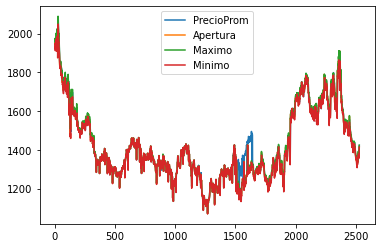

In [87]:
preciosoro.plot.line()

podemos ver que el los precios del oro promedio, el mas alto y mas bajo son practicamente los mismos por lo que no existen cambios drasticos, ademas se puede apreciar que no existe una tendencia marcada en el precio del oro

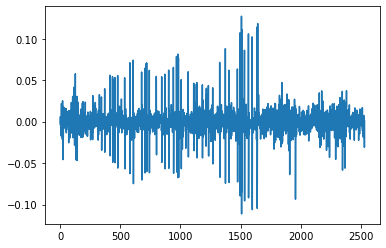

In [88]:
nuevaoro['Cambio'].plot.line()

In [44]:
import seaborn as sns


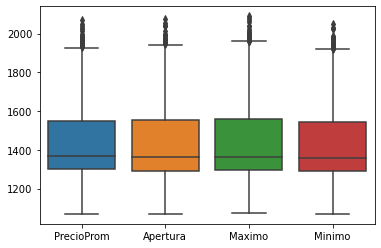

In [89]:


sns.boxplot(
    data=preciosoro
)

Nos damos cuenta que los precios del oro se distribuyen practicamente igual lo que nos demuestra que no hay tantas variaciones duratne el dia, esto nos sirve por que queremos saber si es conveniente realizar transacciones durante un mismo dia

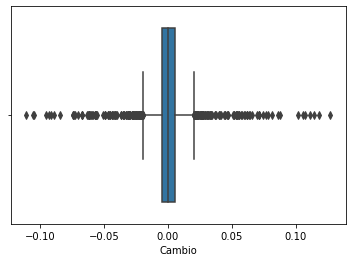

In [91]:
sns.boxplot(nuevaoro.Cambio)

Del mismo modo podemos ver que los datos no cambian tanto dia con dia puesto que la mayoria estan centrados en el 0%


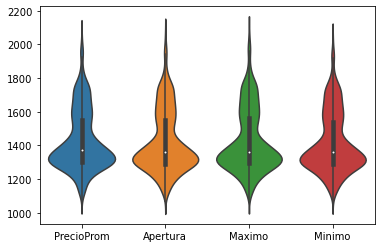

In [93]:
sns.violinplot(
    data=preciosoro)

# Conlusion:

- Con estos primeros pasos que hemos realizado nos hemos dado cuenta de algunas cosas de nuestra base de datos, hemos observado como se comportan nuestros datos dia con dia y podemos ver la tendencia que ha ido teniendo el precio del oro desde el 2011, al visualizar estos datos o hemos podido identificar una tendencia clara que nos muestre como se va a comportar a futuro, por que necesitamos hacer mas analisis estadistico para poder calcular inferir sus precios futuros.
- Con nuestras graficas pudimos ver que no existe gran cambio durante un mismo dia por lo que podriamos trabajar con un solo tipo de precio para realizar nuestras predicciones sobre el precio